### Data preprocessing and and EDA for pothole and street maintance in Seattle (from a FOI request)

In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import sys 
import datetime as dt
import string

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('poster', rc={'font.size':35,
                              'axes.titlesize':50,
                              'axes.labelsize':35})

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

In [5]:
#path for FOI request, contains multiple excel files (1 per year)
path = 'C:/Users/Schindler/Documents/ProgrammingFun/FIFI/potholes_streetmaint'

In [6]:
#list pdfs in path
files = os.listdir(path)
print(len(files), '\n', files[0])

#create path names for pdfs in path
files_path_names = []
for file in files:
    path_name = path + '/' + file
    files_path_names.append(path_name)

print(len(files_path_names))
files_path_names[0:3]

7 
 1.1.2013 - 12.31.2013.csv
7


['C:/Users/Schindler/Documents/ProgrammingFun/FIFI/potholes_streetmaint/1.1.2013 - 12.31.2013.csv',
 'C:/Users/Schindler/Documents/ProgrammingFun/FIFI/potholes_streetmaint/1.1.2014 -12.31.2014.csv',
 'C:/Users/Schindler/Documents/ProgrammingFun/FIFI/potholes_streetmaint/1.1.2015 - 12.31.2015.csv']

In [36]:
#read data into pandas dataframe
comb_data = pd.DataFrame()

for file in files_path_names:
    int_file = pd.DataFrame(data = pd.read_csv(file))
    int_file['year'] = file.split('/')[-1].split('-')[0].split('.')[2]
    print(int_file.shape)
    if comb_data.shape[0] == 0:
        comb_data = int_file
    else:
        comb_data = pd.concat([comb_data, int_file], ignore_index=True, axis=0)
        
print(comb_data.shape)
comb_data.head()

(4106, 48)
(5294, 48)
(4858, 48)
(5682, 48)
(11708, 47)
(6626, 48)
(6762, 48)
(45036, 48)


,Action Taken,Activity,Added By,Address,Approved By,Approved Date,Asset ID,Asset Type,Assign To Low Org,Assigned To,Budget Charge #,Chrg Code Type,City Sector,Claim #,Closed,Comments,Crew Chief,Cross Street 1,Cross Street 2,Due,Est Completion,External Ref #,Field End,Field Start,Initiated,Location,Maintenance Type,Milestone,Neighborhood,On Hold,Owning Group,Primary Council District,Priority,Problem,Project,RS1 No,RS1 Type,RS2 No,RS2 Type,Ready for Field Work,Result,Scheduled,Secondary Council District,Source,Supervisor,Unnamed: 46,WO #,year
0,NaN,MO-Mtc,HARVEYK,WESTERN AVE,,NaN,10420,Street Segment,TR325,MONROEAN,,ACT,W,NaN,1/1/2013 00:00,Pothole @ intersection\n\rDan (206) 493-1233,GREENK,UNIVERSITY,UNION,1/4/2013 00:00,NaN,NaN,12/31/2012 22:25,12/31/2012 22:18,1/1/2013 03:06,Western & University,Corrective,Closed (Assets),DWNTN,N,,DISTRICT7,,SM-Pothole,,NaN,,NaN,,NaN,Done,NaN,,Citizen,GREENK,NaN,180017,2013
1,NaN,MO-Mtc,BROWNPK,S HOLGATE ST,,NaN,16180,Street Segment,TR325,RONGREM,,ACT,SW,NaN,1/1/2013 00:00,One Large and one medium pothole at stop sign.,GREENK,HOLGATE,AIRPORT (S LEG),1/4/2013 00:00,NaN,NaN,1/1/2013 20:39,1/1/2013 20:39,1/1/2013 13:32,On 8th at Stop sign at the end of Beacon or Holgate bridge,Corrective,Closed (Assets),GRDWM,N,,DISTRICT2,,SM-Pothole,,NaN,,NaN,,NaN,Done,NaN,,Other,GREENK,NaN,180025,2013
2,NaN,MO-Mtc,BROWNPK,GREENWOOD AVE N,,NaN,07105,Street Segment,TR335,LUTOVSD,,ACT,NW,NaN,1/3/2013 00:00,"Location: 14409 GREENWOOD AVE N, SEATTLE, WA 98133\n\r\n\rSR13-00000012description:2 BIG POTHOLES HAVE DAMAGED 3 CARS. SEEMS LIKE THE EDGES OF THIS LOCATION IS GETTING A LOT OF DAMAGE BECAUSE OF THE RAIN. ONE HOLE IS ALMOST 2 FEET DEEP. I AM TRYING TO FILL IN WITH MY ROCKS AS I CAN EVERYDAY. RIGHT ON EDGES OF GREENWOOD IN FRONT OF CHINA BUFFET, PHO SAIGON AND HIGHLAND MARKET. PLEASE FIX THEM SOON.\n\r\n\rConstituent: HUNG LAMPhone: 206-613-9963E-mail: Address: 14409 GREENWOOD AVE N, SEATTLE, WA 98133\n\r",LUTOVSD,144TH,145TH,1/4/2013 00:00,NaN,1300000012,1/3/2013 15:21,1/3/2013 15:21,1/1/2013 13:40,On edges of road,Corrective,Closed (Ops),NW,N,,DISTRICT5,,SM-Pothole,,NaN,,NaN,,NaN,Done,1/3/2013 00:00,,Citizen,SCOTTMS,NaN,180026,2013
3,NaN,MO-Mtc,BROWNPK,E JOHN ST,,NaN,11200,Street Segment,TR325,POTTSM,,ACT,E,NaN,1/1/2013 00:00,Sarah Walch 206-715-5202 There are 2 pothole on E John between 11th and 14th Ave E heading westbound right side.,GREENK,14TH,JOHN (S RD),1/4/2013 00:00,NaN,NaN,1/1/2013 14:40,1/1/2013 14:30,1/1/2013 13:50,E John St between 11th and 14th Ave E WB Rside,Corrective,Closed (Assets),E,N,,DISTRICT3,,SM-Pothole,,NaN,,NaN,,NaN,Done,NaN,,Citizen,GREENK,NaN,180027,2013
4,NaN,MO-Mtc,BROWNPK,35TH AVE SW,,NaN,02720,Street Segment,TR325,RONGREM,,ACT,SW,NaN,1/1/2013 00:00,"Eric Goetz 206-818-2546 pothole in front of address 5945 35th Ave SW\n\rLocation: 5948 35TH AVE SW, SEATTLE, WA 98126\n\r\n\rSR13-00000016description:large pothole, southbound left lane.\n\r\n\rConstituent: GARY BENSONPhone: 206-242-3232E-mail: gl.benson@comcast.netAddress: \n\r\n\rSR add to Work order that was called in\n\r",GREENK,JUNEAU,RAYMOND,1/4/2013 00:00,NaN,1300000016,1/1/2013 20:43,1/1/2013 20:43,1/1/2013 13:55,In front of 5945 35th Ave SW,Corrective,Closed (Assets),SW,N,,DISTRICT1,,SM-Pothole,,NaN,,NaN,,NaN,Done,NaN,,Citizen,GREENK,NaN,180028,2013


In [93]:
comb_data['start_month'] = comb_data['Field Start'].apply(lambda x: str(x).split('/')[0])
comb_data['start_month'] = comb_data['start_month'].apply(lambda x: '0'+x if len(x) == 1 else x)

In [69]:
comb_data.columns.values

array(['Action Taken', 'Activity', 'Added By', 'Address', 'Approved By',
       'Approved Date', 'Asset ID', 'Asset Type', 'Assign To Low Org',
       'Assigned To', 'Budget Charge #', 'Chrg Code Type', 'City Sector',
       'Claim #', 'Closed', 'Comments', 'Crew Chief', 'Cross Street 1',
       'Cross Street 2', 'Due', 'Est Completion', 'External Ref #',
       'Field End', 'Field Start', 'Initiated', 'Location',
       'Maintenance Type', 'Milestone', 'Neighborhood', 'On Hold',
       'Owning Group', 'Primary Council District', 'Priority', 'Problem',
       'Project', 'RS1 No', 'RS1 Type', 'RS2 No', 'RS2 Type',
       'Ready for Field Work', 'Result', 'Scheduled',
       'Secondary Council District', 'Source', 'Supervisor',
       'Unnamed: 46', 'WO #', 'year', 'start_month'], dtype=object)

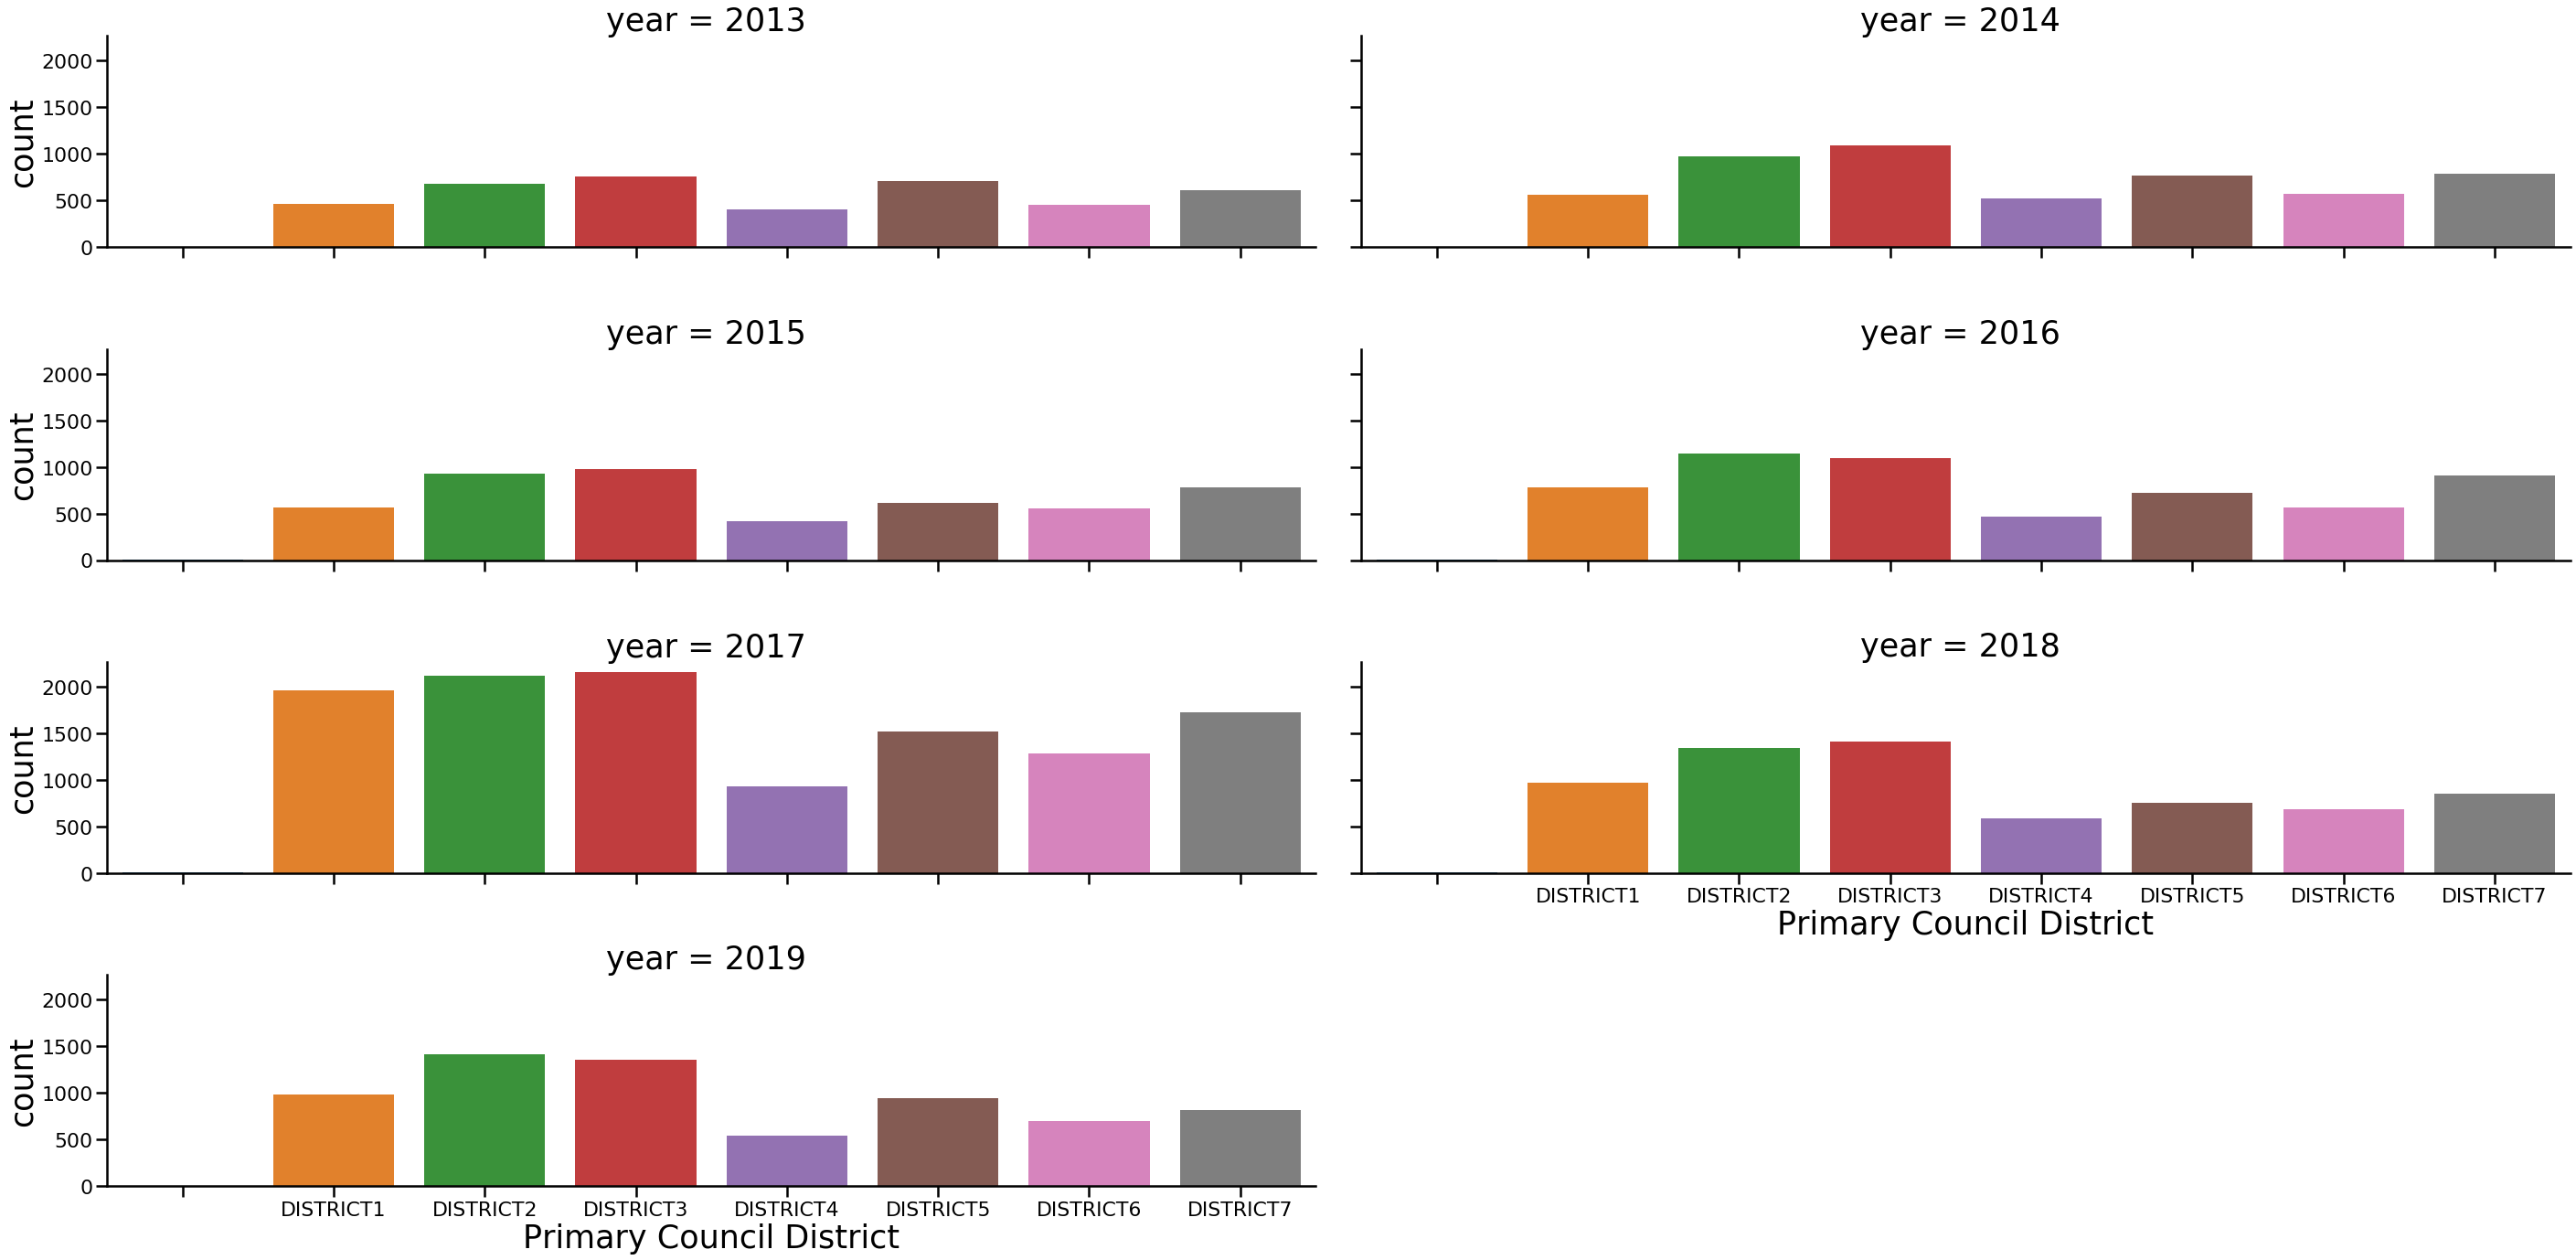

In [104]:
year_district_count = comb_data.groupby(['year', 'Primary Council District'])['Primary Council District'].count().reset_index(name='count')
sns.catplot(x='Primary Council District', y='count', data=year_district_count, kind='bar', col='year', col_wrap=2,  height=5, aspect=4)

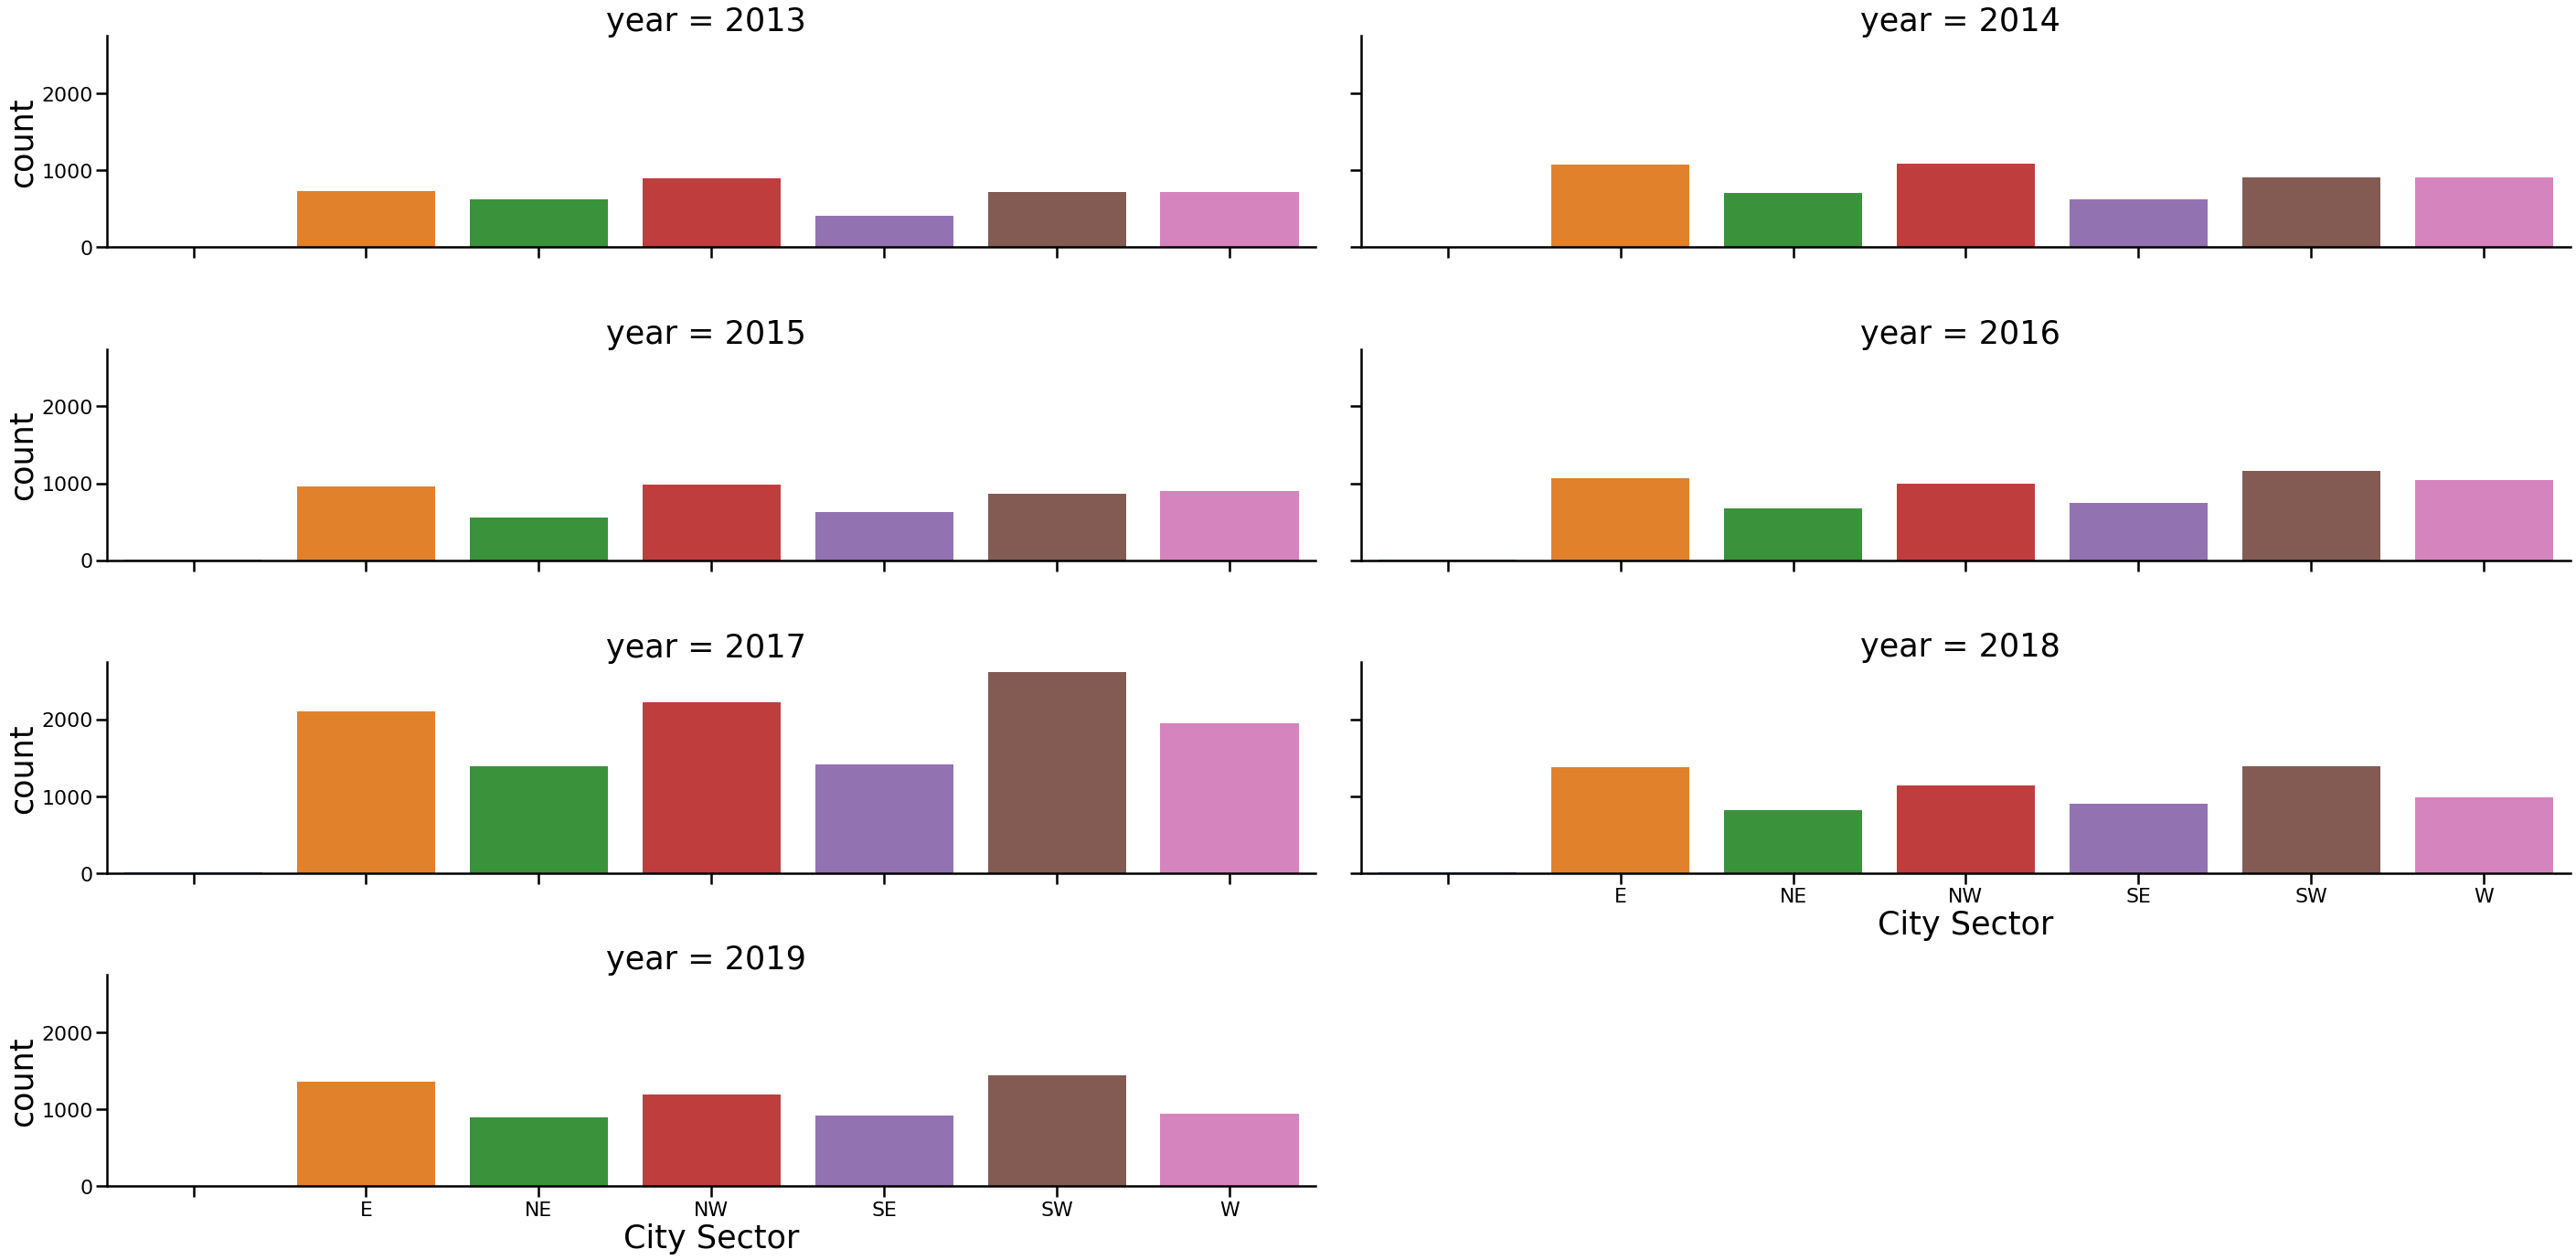

In [105]:
year_sector_count = comb_data.groupby(['year', 'City Sector'])['City Sector'].count().reset_index(name='count')
sns.catplot(x='City Sector', y='count', data=year_sector_count, kind='bar', col='year', col_wrap=2,  height=5, aspect=4)

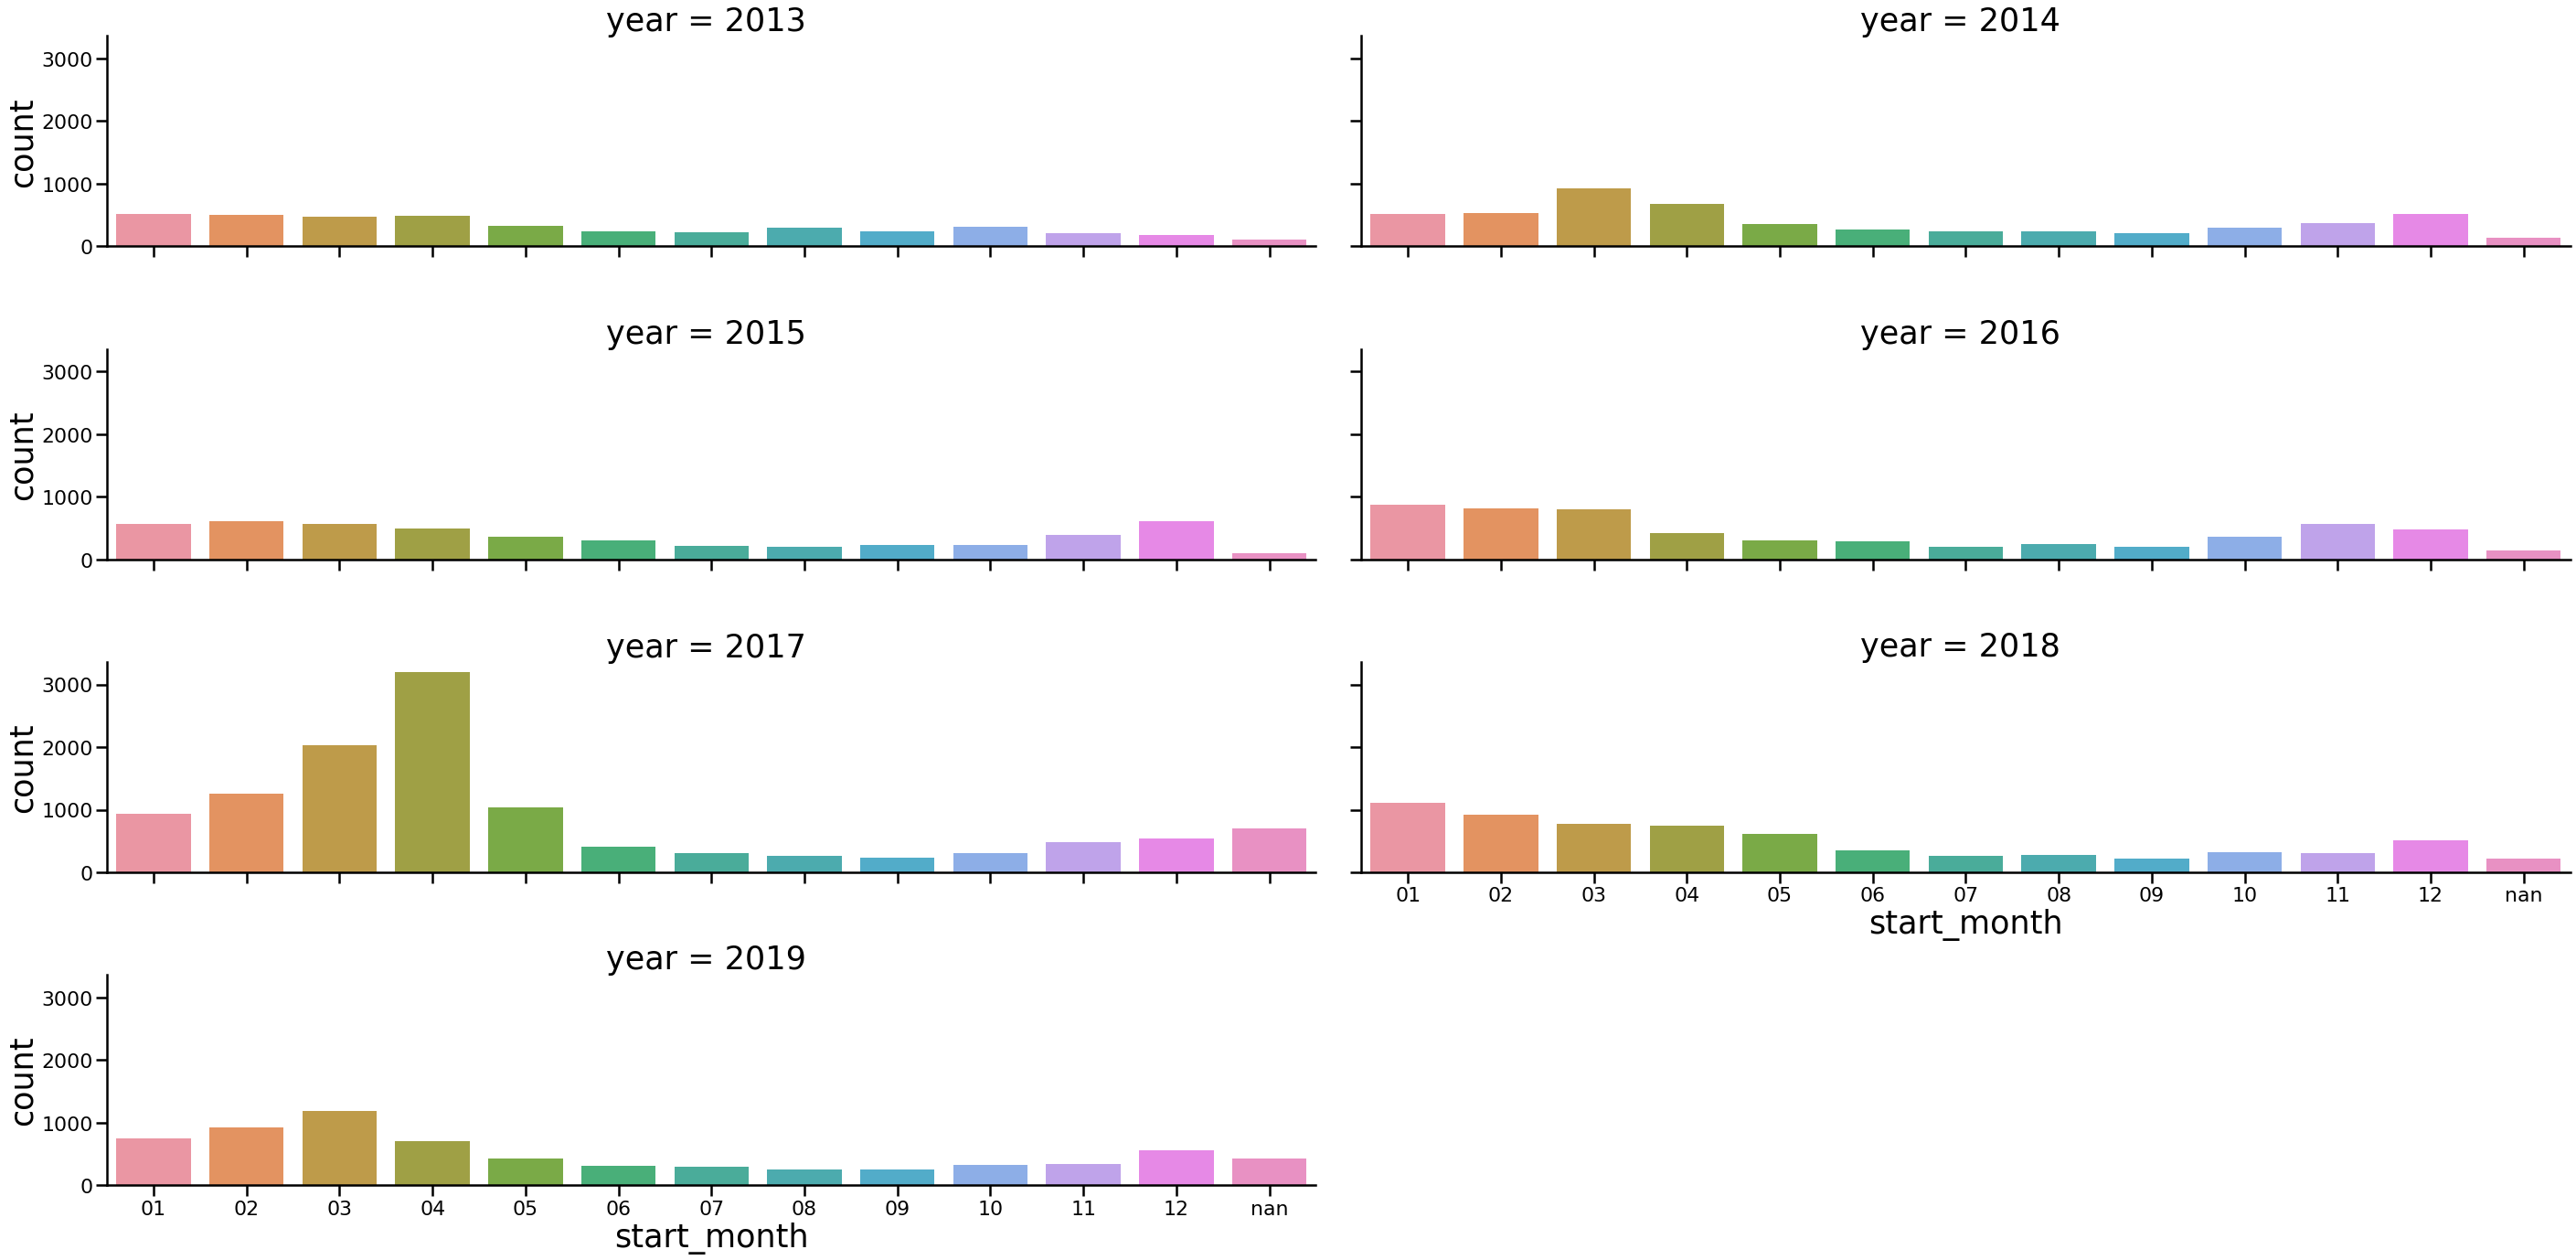

In [94]:
year_month_count = comb_data.groupby(['year', 'start_month'])['start_month'].count().reset_index(name='count')
sns.catplot(x='start_month', y='count', data=year_month_count, kind='bar', col='year', col_wrap=2,  height=5, aspect=4)